<img src="https://thelogisticsworld.com/wp-content/uploads/2023/04/Mercado-Libre-2-1-828x548.jpg" alt="Imagen MeLi" width="30%"/>


# Data Science Challenge primera parte
## Exploración y Análisis

En este análisis exploratorio, se usaron datos extraídos de la API de Mercado Libre, que contiene información detallada sobre productos listados en su plataforma de comercio electrónicod de México, con el objetivo de analizar los productos que tienen descuentos. 

Objetivo del Análisis:
Realizar un análisis exploratorio de las publicaciones con descuento de la plataforma de Mercado Libre extraidos de la API search México, estos datos nos podrían ayudar a entender mejor las características de los productos, los patrones de venta, y otros factores que podrían influir en el comportamiento de los usuarios.

Descripción del Dataset:
El dataset incluye 86,287 observaciones distribuidas en 39 columnas, cada una representando diferentes aspectos de los productos y sus listados. A continuación, se presentan algunas de las variables más importantes:

- **id**: Identificador único del producto en la plataforma. Este campo es crucial para distinguir entre diferentes productos y detectar posibles duplicados.
- **title**: Descripción del producto
- **price**: Precio del producto en la moneda local. Es una variable clave para analizar la relación entre precio y comportamiento de compra.
- **original_price**: Precio original del producto, esta variable solo tiene un valor si el producto en cuestión tiene descuento.
- **condition**: Condición del producto, que puede ser "new", "used", u otras categorías específicas. Es relevante para entender las preferencias de los compradores según el estado del producto.
- **available_quantity**: Cantidad disponible de productos para la venta. Este campo puede indicar la popularidad y la demanda de un producto.
- **permalink**: El link que te lleva al producto en la plataforma.
- **listing_type_id**: Tipo de listado del producto, como "buy_it_now" o "auction". Esta variable ayuda a identificar el formato de venta más efectivo.
- **buying_mode**: Modo de compra, que indica si el producto se vende a precio fijo o en subasta. Es importante para analizar las preferencias del usuario en términos de métodos de compra.
- **seller_id**: Identificador del vendedor, lo que permite realizar análisis centrados en los vendedores, como la reputación o el volumen de ventas.
- **shipping**: Información sobre el envío, que incluye detalles como si el envío es gratuito o no. El costo de envío puede ser un factor decisivo en la decisión de compra.
- **accepts_mercadopago**: Indica si el vendedor acepta MercadoPago como método de pago. Dado que MercadoPago es una opción de pago popular en la región, esta variable puede influir en las conversiones.
- **category_id**: Categoría a la que pertenece el producto. Es útil para segmentar el análisis por tipo de producto y detectar patrones dentro de cada categoría.
- **category**: El nombre de la categoría a la que pertenece el producto.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib as mpl
import seaborn as sns

from adjustText import adjust_text

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from nltk.corpus import stopwords
import nltk
import re
import ast

import warnings
import os

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

/Users/danielrodriguez/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Read Data

In [2]:
# Reading dataframe
df_all_categories = pd.read_csv('mercado_libre_all_combined.csv')


### Visualización de valores nulos, dimensiones, duplicados y tipo de datos del dataframe df

In [3]:
df_all_categories.head()

id                                              title condition  \
0  MLM1936042479                 3 Piezas De Minoxidil 5% Anacastel       new   
1  MLM1489231789      Kimberly-clark Sanitas Pack 20x100 Doble Hoja       new   
2  MLM1974972700  Garnier Express Aclara Limpiador Purificante P...       new   
3  MLM1887206213  Versace Pour Homme Eau De Toilette 100 ml Para...       new   
4  MLM1788372545  Gel Cerave Limpiador Espumoso Piel Normal A Gr...       new   

                   thumbnail_id catalog_product_id listing_type_id  \
0  835039-MLU74994079112_032024        MLM24452767    gold_special   
1  798689-MLU75381250569_032024        MLM19532504        gold_pro   
2  884700-MLU75814218598_042024        MLM22305033    gold_special   
3  777847-MLA72918122987_112023         MLM6140599    gold_special   
4  756055-MLU76714125910_062024        MLM19559684    gold_special   

                                     sanitized_title  \
0                  3-piezas-de-minoxidil-5-anacastel   
1      kimberly-clark-sanitas-pack-20x100-doble-hoja   
2  garnier-express-aclara-limpiador-purificante-p...   
3  versace-pour-homme-eau-de-toilette-100ml-para-...   
4  gel-cerave-limpiador-espumoso-piel-normal-a-gr...   

                                           permalink buying_mode site_id  \
0  https://www.mercadolibre.com.mx/3-piezas-de-mi...  buy_it_now     MLM   
1  https://www.mercadolibre.com.mx/kimberly-clark...  buy_it_now     MLM   
2  https://www.mercadolibre.com.mx/garnier-expres...  buy_it_now     MLM   
3  https://www.mercadolibre.com.mx/versace-pour-h...  buy_it_now     MLM   
4  https://www.mercadolibre.com.mx/gel-cerave-lim...  buy_it_now     MLM   

  category_id                      domain_id  \
0   MLM171894            MLM-HAIR_TREATMENTS   
1   MLM167970              MLM-TOILET_PAPERS   
2   MLM178705  MLM-FACIAL_SKIN_CARE_PRODUCTS   
3     MLM1271                   MLM-PERFUMES   
4   MLM178705  MLM-FACIAL_SKIN_CARE_PRODUCTS   

                                           thumbnail currency_id  \
0  http://http2.mlstatic.com/D_835039-MLU74994079...         MXN   
1  http://http2.mlstatic.com/D_798689-MLU75381250...         MXN   
2  http://http2.mlstatic.com/D_884700-MLU75814218...         MXN   
3  http://http2.mlstatic.com/D_777847-MLA72918122...         MXN   
4  http://http2.mlstatic.com/D_756055-MLU76714125...         MXN   

   order_backend  price  original_price  \
0              1 363.00          660.00   
1              2 255.00             NaN   
2              3  98.83          199.00   
3              4 884.00             NaN   
4              5 285.00          539.00   

                                          sale_price  available_quantity  \
0  {'price_id': '', 'amount': 363, 'conditions': ...                5000   
1  {'price_id': '', 'amount': 255, 'conditions': ...                 500   
2  {'price_id': '', 'amount': 98.83, 'conditions'...                5000   
3  {'price_id': '', 'amount': 884, 'conditions': ...                 500   
4  {'price_id': '', 'amount': 285, 'conditions': ...                5000   

   official_store_id official_store_name  use_thumbnail_id  \
0           5,707.00           Farmapiel              True   
1                NaN                 NaN              True   
2           1,004.00             Garnier              True   
3             671.00       The Fragrance              True   
4           2,768.00              CeraVe              True   

   accepts_mercadopago                                           shipping  \
0                 True  {'store_pick_up': False, 'free_shipping': Fals...   
1                 True  {'store_pick_up': False, 'free_shipping': Fals...   
2                 True  {'store_pick_up': False, 'free_shipping': Fals...   
3                 True  {'store_pick_up': False, 'free_shipping': True...   
4                 True  {'store_pick_up': False, 'free_shipping': True...   

                  stop_time  \
0  2044-02-28T16:08:31.000Z   


In [4]:
df_all_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86287 entries, 0 to 86286
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    86287 non-null  object 
 1   title                 86287 non-null  object 
 2   condition             86287 non-null  object 
 3   thumbnail_id          86234 non-null  object 
 4   catalog_product_id    19099 non-null  object 
 5   listing_type_id       86287 non-null  object 
 6   sanitized_title       53694 non-null  object 
 7   permalink             86287 non-null  object 
 8   buying_mode           86287 non-null  object 
 9   site_id               86287 non-null  object 
 10  category_id           86287 non-null  object 
 11  domain_id             86287 non-null  object 
 12  thumbnail             86234 non-null  object 
 13  currency_id           86287 non-null  object 
 14  order_backend         86287 non-null  int64  
 15  price              

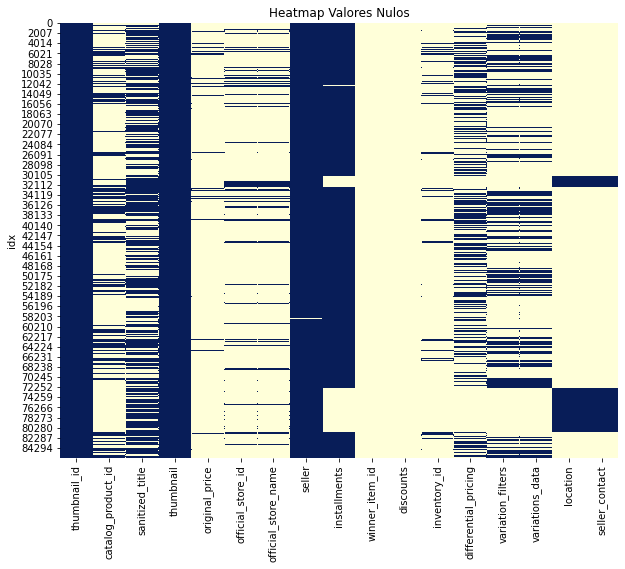

In [5]:
# Calculate the percentage of missing values for each column
missing_values = df_all_categories.isnull().mean() * 100

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_all_categories[missing_values.index].isnull(), cbar=False, cmap='YlGnBu_r')
plt.title('Heatmap Valores Nulos')
#plt.xlabel('Columnas')
plt.ylabel('idx')
plt.show()


Revisamos a grandes rasgos el dataframe, donde vemos que contiene 39 columnas con 85,811 observaciones, vemos que columnas como:

- `winner_item_id`, 
- `discounts`, 
- `inventory_id`, 
- `location`, 
- `seller_contact`, 
- `official_store_id`, 
- `official_store_name`,
- `differential_pricing`,
- `variation_filters`,
- `variations_data`,
- `catalog_product_id` y 
- `original_price` 

tienen una cantidad considerable de valores nulos

In [6]:
# Vemos si tenemos observaciones duplicadas
print(df_all_categories.shape)
print(df_all_categories.id.nunique())
print(df_all_categories.duplicated().sum())

(86287, 39)
83810
0


Existen algunos id's duplicados, pero ninguna de la filas es duplicada, vamos a verificar porque

In [7]:
df_all_categories.id.value_counts()

MLM1990068773    2
MLM857328355     2
MLM2663412160    2
MLM1970279481    2
MLM2749107396    2
                ..
MLM2071325977    1
MLM2901425708    1
MLM1433926556    1
MLM2029394967    1
MLM3185150630    1
Name: id, Length: 83810, dtype: int64

In [8]:
df_all_categories[lambda x:x.id=="MLM3036124408"]

id                                              title  \
6038  MLM3036124408  Báscula Digital Inteligente Escala Grasa Corpo...   
9080  MLM3036124408  Báscula Digital Inteligente Escala Grasa Corpo...   

     condition                  thumbnail_id catalog_product_id  \
6038       new  737189-MLU73418549107_122023        MLM28879943   
9080       new  737189-MLU73418549107_122023        MLM28879943   

     listing_type_id                                    sanitized_title  \
6038        gold_pro  bascula-digital-inteligente-escala-grasa-corpo...   
9080        gold_pro  bascula-digital-inteligente-escala-grasa-corpo...   

                                              permalink buying_mode site_id  \
6038  https://www.mercadolibre.com.mx/bascula-digita...  buy_it_now     MLM   
9080  https://www.mercadolibre.com.mx/bascula-digita...  buy_it_now     MLM   

     category_id              domain_id  \
6038     MLM5387  MLM-BODYWEIGHT_SCALES   
9080     MLM5387  MLM-BODYWEIGHT_SCALES   

                                              thumbnail currency_id  \
6038  http://http2.mlstatic.com/D_737189-MLU73418549...         MXN   
9080  http://http2.mlstatic.com/D_737189-MLU73418549...         MXN   

      order_backend  price  original_price  \
6038             31 171.00             NaN   
9080             30 171.00             NaN   

                                             sale_price  available_quantity  \
6038  {'price_id': '', 'amount': 171, 'conditions': ...                 100   
9080  {'price_id': '', 'amount': 171, 'conditions': ...                 100   

      official_store_id official_store_name  use_thumbnail_id  \
6038                NaN                 NaN              True   
9080                NaN                 NaN              True   

      accepts_mercadopago                                           shipping  \
6038                 True  {'store_pick_up': False, 'free_shipping': Fals...   
9080                 True  {'store_pick_up': False, 'free_shipping': Fals...   

                     stop_time  \
6038  2044-08-05T01:43:18.000Z   
9080  2044-08-05T01:43:18.000Z   

                                                 seller  \
6038  {'id': 746291806, 'nickname': 'PERIITECHGLOBAL...   
9080  {'id': 746291806, 'nickname': 'PERIITECHGLOBAL...   

                                             attributes  \
6038  [{'id': 'BRAND', 'name': 'Marca', 'value_id': ...   
9080  [{'id': 'BRAND', 'name': 'Marca', 'value_id': ...   

                                           installments  winner_item_id  \
6038  {'quantity': 3, 'amount': 57, 'rate': 0, 'curr...             NaN   
9080  {'quantity': 3, 'amount': 57, 'rate': 0, 'curr...             NaN   

      catalog_listing  discounts promotions inventory_id differential_pricing  \
6038             True        NaN         []    XBDO96697     {'id': 35713375}   
9080             True        NaN         []    XBDO96697     {'id': 35713375}   

     variation_filters variations_data                     category location  \
6038               NaN             NaN            Electrodomésticos      NaN   
9080               NaN             NaN  Salud y Equipamiento Médico      NaN   

     seller_contact  
6038            NaN  
9080            NaN

Revisando la info de uno de los id's repetidos, se observa que pertenecen a dos categorias diferentes y la columna order_backend también es distinta, dado esto podemos decir que un producto puede pertenecer a dos categorías al mismo tiempo.

In [9]:
df_all_categories[lambda x:x.id=="MLM3036124408"]['category'].value_counts()

Electrodomésticos              1
Salud y Equipamiento Médico    1
Name: category, dtype: int64

### Distribución de precios y análisis por categoría

Veamos como se distribuyen los precio por categorías, dado por la naturaleza de los diferentes productos existen diversos rangos de precios.

In [10]:
df_all_categories['price'].describe(percentiles=[.1, .25, .5, .75, .9])


count       86,287.00
mean       110,479.52
std        674,622.37
min              1.00
10%            415.00
25%          3,600.00
50%         10,999.00
75%         26,000.00
90%         72,500.00
max     10,000,000.00
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

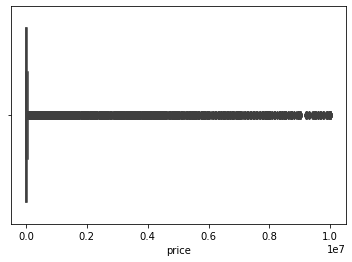

In [11]:
sns.boxplot(df_all_categories['price'])

Vemos que existen muchos outliers, veamos como se ve la distribución por categoría

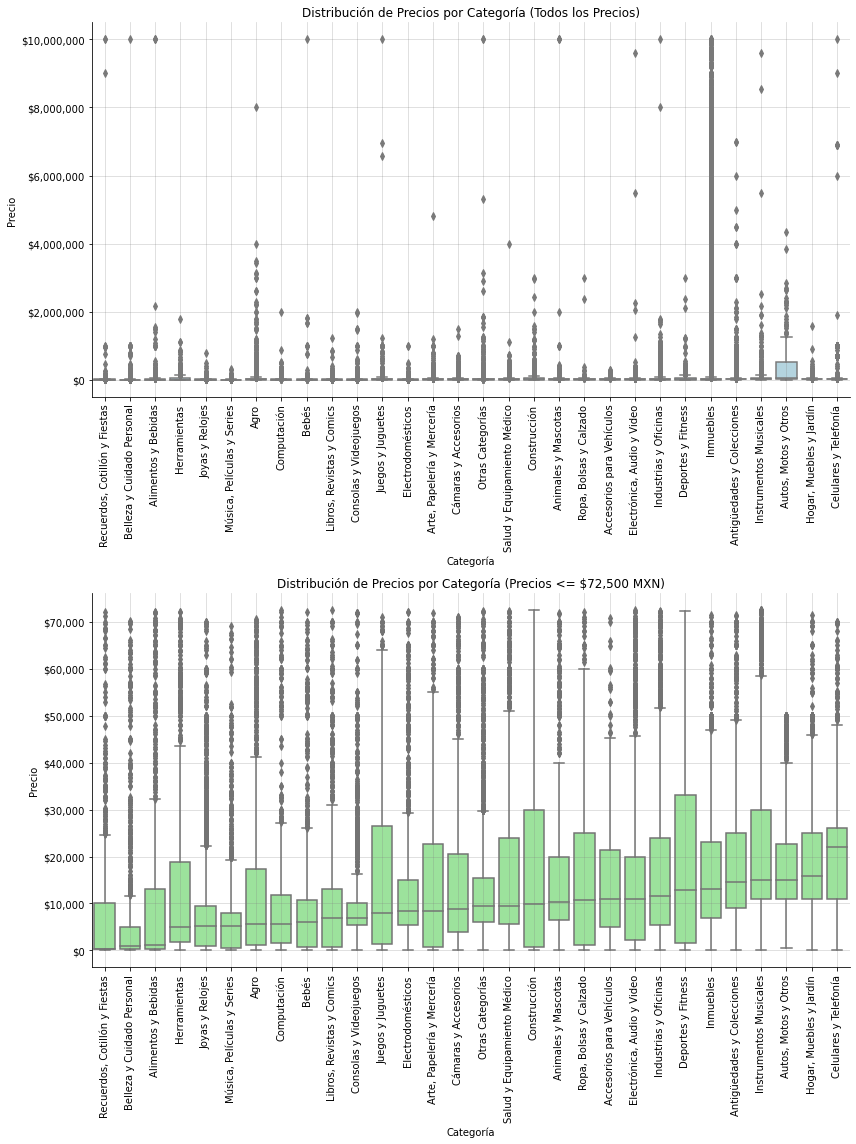

In [12]:

# Ordenar las categorías por el precio mediano
median_prices = df_all_categories[lambda x:x.price<=72500].groupby('category')['price'].median().sort_values()

# Crear el gráfico de boxplots con categorías ordenadas por precio mediano
fig, ax = plt.subplots(2, 1, figsize=(12, 16))

# Primer gráfico: todos los precios
sns.boxplot(x='category', y='price', data=df_all_categories, order=median_prices.index, color='lightblue', ax=ax[0])
ax[0].set_title('Distribución de Precios por Categoría (Todos los Precios)')
ax[0].set_xlabel('Categoría')
ax[0].set_ylabel('Precio')
ax[0].tick_params(axis='x', rotation=90)
ax[0].yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax[0].spines["top"].set_visible(False)  
ax[0].spines["right"].set_visible(False)
ax[0].grid(alpha = 0.3, color = 'gray')

# Segundo gráfico: precios <= 72500
sns.boxplot(x='category', y='price', data=df_all_categories[df_all_categories['price'] <= 72500], order=median_prices.index, color='lightgreen', ax=ax[1])
ax[1].set_title('Distribución de Precios por Categoría (Precios <= $72,500 MXN)')
ax[1].set_xlabel('Categoría')
ax[1].set_ylabel('Precio')
ax[1].tick_params(axis='x', rotation=90)
ax[1].yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax[1].spines["top"].set_visible(False)  
ax[1].spines["right"].set_visible(False)
ax[1].grid(alpha = 0.3, color = 'gray')

plt.tight_layout()
plt.show()


De La distribución por categoría en el gráfico anterior podemos observar lo siguiente:

1. Variabilidad de Precios:
- Alta variabilidad: Categorías como "Belleza y Cuidado Personal" y "Electrónica" tienen una amplia dispersión de precios, lo que sugiere una gama diversa de productos, desde básicos hasta premium.
- Baja variabilidad: Categorías como "Libros" y "Papelería" muestran precios más homogéneos, indicando un mercado más estandarizado.

2. Medianas de Precios:
- Altas medianas: "Electrónica" y "Hogar y Muebles" tienden a tener productos más costosos.
- Bajas medianas: "Accesorios de Moda" y "Papelería" tienen precios medianos más bajos, reflejando productos más accesibles.
    
3. Outliers:
- Con outliers: "Electrónica" y "Belleza y Cuidado Personal" presentan productos significativamente más caros que el promedio.
- Sin outliers: "Libros" y "Papelería" tienen precios más consistentes, sin productos que se destaquen excesivamente en precio.

4. Medianas Similares vs. Distantes:
- Similares: Categorías como "Accesorios de Moda" y "Libros" tienen medianas de precio cercanas, sugiriendo estrategias de pricing similares.
- Distantes: Comparar categorías como "Electrónica" y "Papelería" muestra diferencias claras en percepción de valor y público objetivo.


### Análisis de descuento de productos

Veamos cuántos productos tienen descuentos

In [13]:
df_disc = df_all_categories[lambda x:x.original_price.notnull()]
print(df_disc.shape)
print(df_disc.id.nunique())


(5047, 39)
4944


Calculamos el porcentaje de descuento

In [14]:
df_disc['disc_prc'] = (1-(df_disc['price']/df_disc['original_price']))*100


Vamos a ver como se distribuyen los descuentos porcentuales en general 

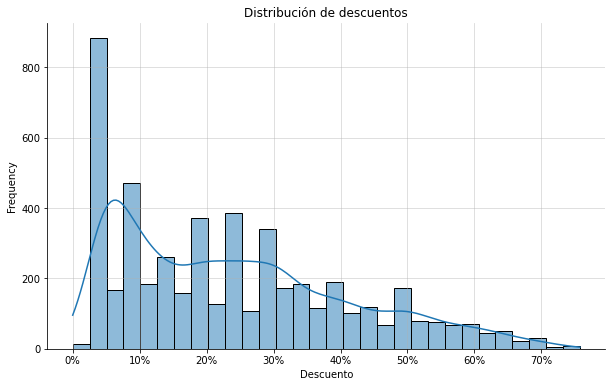

count   5,047.00
mean       24.19
std        17.00
min         0.00
25%        10.00
50%        20.59
75%        35.00
max        75.76
Name: disc_prc, dtype: float64

In [15]:
# Resumen estadistico de la columna disc_prc
discount_summary = df_disc['disc_prc'].describe()

# Grafica la distribución de descuentos
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df_disc['disc_prc'], bins=30, kde=True, ax = ax)
ax.set_title('Distribución de descuentos')
ax.set_xlabel('Descuento')
ax.set_ylabel('Frequency')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.grid(True, alpha = 0.5)
plt.show()

discount_summary

La distribución de los porcentajes de descuento muestra que la mayoría de los productos, en esta muestra, tienen descuentos que varían entre el 10% y el 35%, con una media de aproximadamente del 24.1%. El rango de los descuentos va, desde un mínimo cercano a 0% hasta un máximo de alrededor de casi el 75%.

Veamos la relación entre que porcentaje representan las categorías dentro del dataframe y que porcentaje de descuento tienen

In [16]:
prod_all = df_all_categories['category'].value_counts().reset_index().rename(columns = {'index':'category',
                                                                                        'category':'conteo_total'})

prod_w_disc = df_all_categories[lambda x:x.original_price.notnull()]['category'].value_counts().reset_index().rename(columns = {'index':'category',
                                                                                                                 'category':'conteo_w_disc'})

df_to_plot = prod_all.merge(prod_w_disc, on = 'category', how = 'left')
df_to_plot['conteo_w_disc'] = df_to_plot['conteo_w_disc'].fillna(0)
df_to_plot['prc_disc'] = (df_to_plot['conteo_w_disc']/df_to_plot['conteo_total'])*100
df_to_plot['prc_category'] = (df_to_plot['conteo_total']/df_to_plot['conteo_total'].sum())*100
df_to_plot['prc_category_disc'] = df_to_plot['conteo_w_disc']/df_to_plot['conteo_w_disc'].sum()
df_to_plot = df_to_plot.sort_values("prc_disc")

count   30.00
mean     7.04
std      7.71
min      0.00
25%      2.62
50%      4.25
75%     10.36
max     35.22
Name: prc_disc, dtype: float64

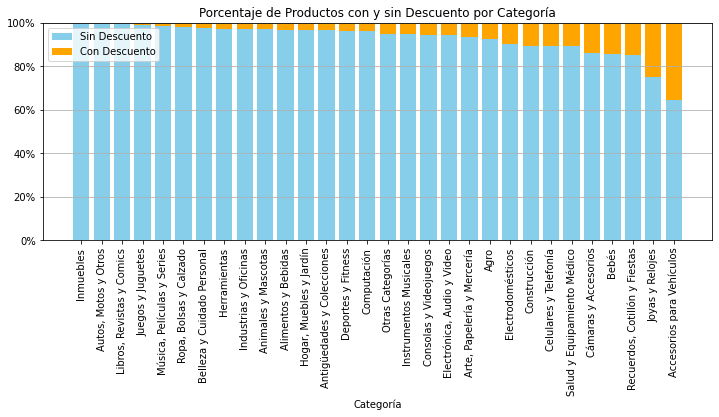

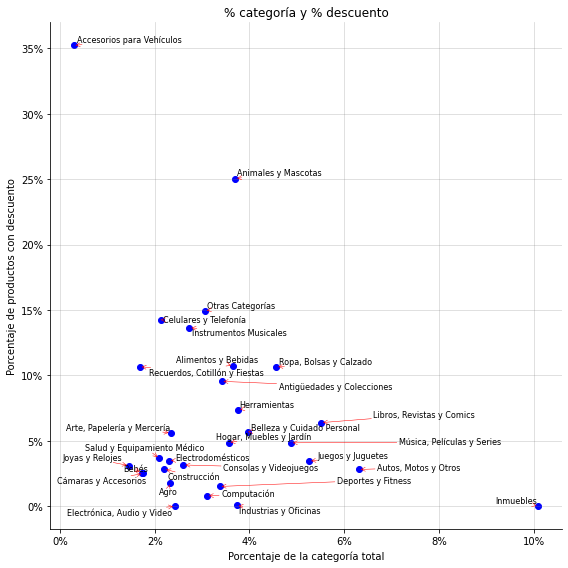

In [17]:
categories = df_to_plot['category']
prc_disc = np.array(df_to_plot['prc_disc'])
prc_no_disc = 100 - prc_disc

fig1, ax1 = plt.subplots(figsize=(12, 4))
ax1.bar(categories, prc_no_disc, label='Sin Descuento', color='skyblue')
ax1.bar(categories, prc_disc, bottom=prc_no_disc, label='Con Descuento', color='orange')

ax1.set_title('Porcentaje de Productos con y sin Descuento por Categoría')
ax1.set_xlabel('Categoría')
#ax1.set_ylabel('Porcentaje (%)')
ax1.tick_params(axis='x', rotation=90)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax1.legend(loc='upper left')
ax1.grid(axis='y')

fig2, ax2 = plt.subplots(figsize=(8, 8))
ax2.scatter(df_to_plot['prc_category'],df_to_plot['prc_disc'], color='b')
ax2.set_title('% categoría y % descuento')
ax2.set_xlabel('Porcentaje de la categoría total')
ax2.set_ylabel('Porcentaje de productos con descuento')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax2.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
    
# Crear anotaciones
texts = []
for i, txt in enumerate(df_to_plot['category']):
    texts.append(ax2.text(df_to_plot['prc_category'][i], df_to_plot['prc_disc'][i], txt, fontsize=8))

# Ajustar las anotaciones para evitar que se encimen
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.grid(True, alpha = 0.3, color = 'gray')

plt.tight_layout()
display(df_to_plot['prc_disc'].describe())
plt.show()

- En promedio se tiene que un 7% de los productos entre todas las categorías tienen descuentos, es decir, muy pocos productos tienen descuentos.
- El top 3 de las categorías que tienen mas productos con descuento son "Accesorios para Vehículos"(35%), seguida de "Joyas y Relojes"(25%) 
- Otras categorías como "Inmuebles", "Autos, Motos y Otros" y "Libros, Revistas y Comics" prácticamente no tienen productos en descuento.
- La categoría Agro tiene un porcentaje alto de productos con descuento (7.06%) comparado con su representación en el total de productos (3.8%). Esto podría ser indicativo de estacionalidad en los productos agrícolas o de un mercado muy competitivo donde los descuentos son necesarios para atraer a compradores.
- La categoría de Electrodomésticos y Construcción muestran un alto porcentaje de productos con descuentos (8.48% y 8.50%) y una representación moderada en el total. Esto podría sugerir un mercado en el que las promociones y descuentos son comunes para atraer clientes, posiblemente debido a la alta competencia o la necesidad de rotación de inventario.

Este análisis sugiere que las dinámicas de precio y descuento varían considerablemente entre categorías. Algunas categorías parecen depender más de los descuentos para impulsar las ventas, mientras que otras, posiblemente debido a su naturaleza o mercado, no utilizan descuentos en absoluto. Identificar estos patrones puede ayudar a tomar decisiones informadas sobre estrategias de precio y promoción en el mercado.

### Análisis de porcentaje de descuento promedio por categoría

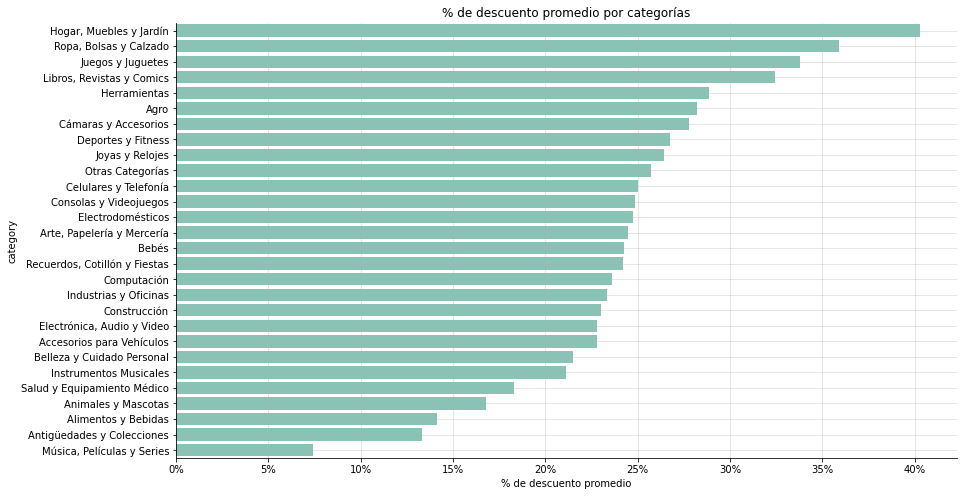

count   28.00
mean    24.36
std      6.77
min      7.43
25%     22.46
50%     24.39
75%     27.02
max     40.30
Name: disc_prc, dtype: float64

In [18]:
# Calcula el descuento promedio para cada categoría
average_discount_by_category = df_disc.groupby('category')['disc_prc'].mean().sort_values(ascending=False)

# Visualize the average discount percentage across multiple categories
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=average_discount_by_category.values, y=average_discount_by_category.index, ax = ax, color = "#7fcdbb")
plt.title('% de descuento promedio por categorías')
plt.xlabel('% de descuento promedio')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.grid(True, alpha = 0.4)
plt.show()

# Display summary statistics for the average discount by category
average_discount_by_category.describe()

- El promedio de descuento por categoría varía por categorías, la mayoría entre 22 y 27%, para algunas categorías como hogar, muebles y jardín tienen mayor descuento siendo el promedio de 43.7%, mientras otras ofrecen un descuento muy pequeño de 7% como música, películas y series. El promedio de todas las categorías esta en 23%. Esto sugiere que ciertas categorías son más propensas a descuentos mayores, potencialmente debido a factores como promociones estacionales, deshacerse de inventario o dar precios más competitivos

### Cuántos productos con descuento tenemos en televisores? y en celulares?

In [19]:
print("Número de televisores en descuento", df_all_categories[lambda x:(x.category=='Electrónica, Audio y Video')&(x.domain_id=='MLM-TELEVISIONS')&(x.original_price.notnull())].id.nunique())
print("Esto representa el", round(df_all_categories[lambda x:(x.category=='Electrónica, Audio y Video')&(x.domain_id=='MLM-TELEVISIONS')&(x.original_price.notnull())].id.nunique()/df_all_categories[lambda x:(x.category=='Electrónica, Audio y Video')&(x.domain_id=='MLM-TELEVISIONS')].id.nunique(),2)*100,"% del total de televisores en la muestra de datos")

print("Número de celulares en descuento", df_all_categories[lambda x:(x.category=='Celulares y Telefonía')&(x.domain_id=='MLM-CELLPHONES')&(x.original_price.notnull())].id.nunique())
print("Esto representa el", round(df_all_categories[lambda x:(x.category=='Celulares y Telefonía')&(x.domain_id=='MLM-CELLPHONES')&(x.original_price.notnull())].id.nunique()/df_all_categories[lambda x:(x.category=='Celulares y Telefonía')&(x.domain_id=='MLM-CELLPHONES')].id.nunique(),2)*100,"% del total de celulares en la muestra de datos")

Número de televisores en descuento 38
Esto representa el 17.0 % del total de televisores en la muestra de datos
Número de celulares en descuento 99
Esto representa el 10.0 % del total de celulares en la muestra de datos


### Relación precio vs descuento

Hacemos la suposición de que los productos más costosos tienen menos descuentos, dado el margen pequeño de ganancia

In [20]:
df_disc['price'].describe(percentiles=[.1, .2, .25, .4, .5, .6, .75, .8, .9])

count       5,047.00
mean       24,888.84
std       288,479.43
min            29.45
10%           137.67
20%           209.77
25%           274.61
40%           736.64
50%         2,009.04
60%         5,763.88
75%        10,499.00
80%        13,022.26
90%        24,022.20
max     8,999,999.10
Name: price, dtype: float64

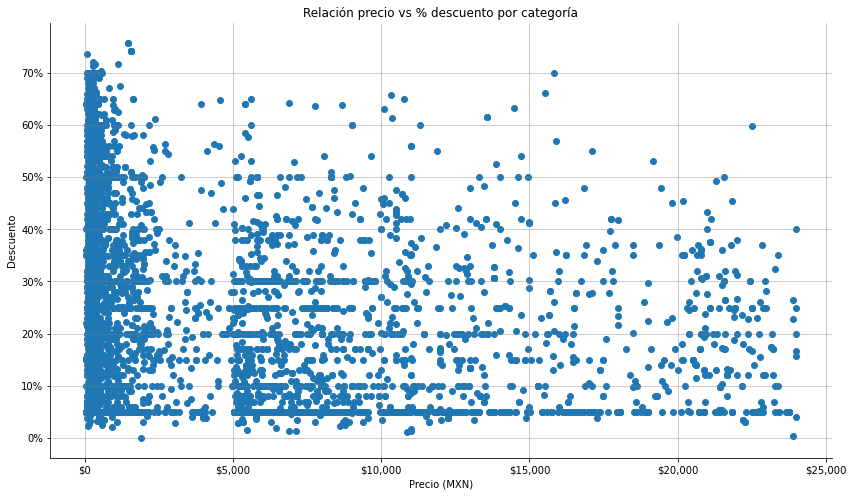

-0.007861627593950864

In [21]:
# Grafica un scatter plot limitando los outliers para poder ver como se correlacionan el precio y descuento
data_plot = df_disc[lambda x:x.price<=24000]
fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(data_plot['price'],data_plot['disc_prc'])
ax.set_title('Relación precio vs % descuento por categoría')
ax.set_xlabel('Precio (MXN)')
ax.set_ylabel('Descuento')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.grid(True, alpha = 0.5, color = 'gray')

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.show()

# Calcula correlación
price_discount_correlation = df_disc[['price', 'disc_prc']].corr().iloc[0, 1]
price_discount_correlation

El análisis muestra una correlación negativa moderada (−0.0078) entre el precio y el porcentaje de descuento. Esto sugiere que, en general, los productos con precios más altos tienden a tener descuentos ligeramente menores en términos porcentuales, pero la relación no es muy fuerte.
Para una comparación justa, podríamos explorar el siguiente paso: normalizar los descuentos en función del precio o segmentar los productos en rangos de precios y comparar los descuentos dentro de cada rango.

Hacemos la segmentación de los productos en rangos de precios y luego compararé los descuentos dentro de cada uno de estos rangos. Esto nos permitirá observar si existe alguna tendencia en los descuentos que sea consistente a través de diferentes niveles de precios

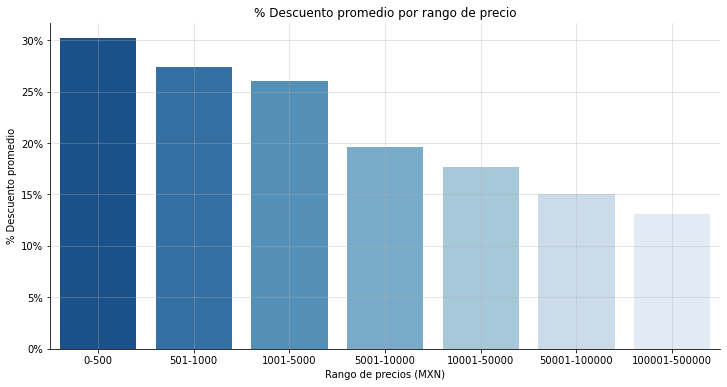

price_range
0-500           30.19
501-1000        27.43
1001-5000       26.05
5001-10000      19.65
10001-50000     17.72
50001-100000    15.08
100001-500000   13.11
Name: disc_prc, dtype: float64

In [22]:
# Definir rangos de precios para la segmentación
price_bins = [0, 500, 1000, 5000, 10000, 50000, 100000, 500000]
price_labels = ['0-500', '501-1000', '1001-5000', '5001-10000', '10001-50000', '50001-100000', '100001-500000']

# Creamos la nueva columna para estos rangos de precios
df_disc['price_range'] = pd.cut(df_disc['price'], bins=price_bins, labels=price_labels)

# Calcula el % de descuento promedio para cada rango de precios
average_discount_by_price_range = df_disc.groupby('price_range')['disc_prc'].mean()

# Graficamos el % promedio de descuento por rango de precio
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=average_discount_by_price_range.index, y=average_discount_by_price_range.values, ax = ax, palette='Blues_r')
plt.title('% Descuento promedio por rango de precio')
plt.xlabel('Rango de precios (MXN)')
plt.ylabel('% Descuento promedio')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.grid(True, alpha = 0.4)
plt.show()

# Display the result
average_discount_by_price_range

El análisis de los descuentos por rangos de precios muestra lo siguiente:

Productos de bajo precio (0-500 MXN): Tienen el mayor promedio de descuento, aproximadamente 30.19%.
Productos de precios moderados (501-5000 MXN): Mantienen un descuento promedio 27.4%, lo que sigue siendo considerable.
Productos de alto precio (5001-100000 MXN): Los descuentos son menores, con un promedio 19.65%.
Esto sugiere que los productos más económicos tienden a recibir mayores descuentos en términos porcentuales, mientras que los productos más caros reciben descuentos más modestos.

Este análisis nos da una perspectiva más ajustada sobre cómo se aplican los descuentos en relación con el precio de los productos.

Solo para confirmar lo que estamos viendo, normalizaremos los descuentos en función del precio, esto es:

$$
\text{Descuento Normalizado} = \left(\frac{\text{Precio Original} - \text{Precio}}{\text{Precio Original}}\right) \times \frac{1}{\text{Precio}}
$$

se calcula el "descuento normalizado" para cada producto. Este descuento normalizado puede ser interpretado como la cantidad de descuento por unidad de precio (por ejemplo, por cada 100 MXN de precio, cuánto es el descuento).

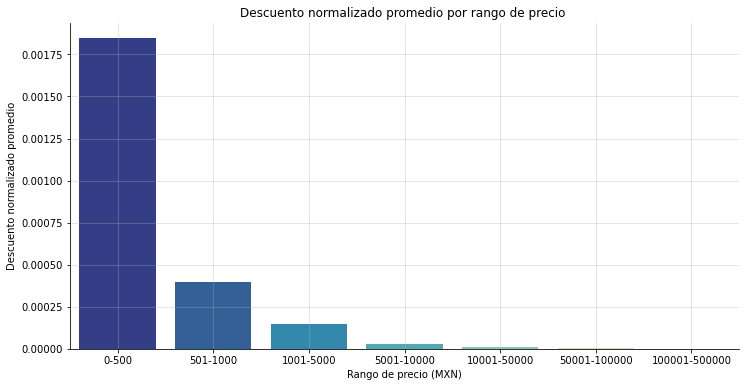

In [23]:
# Calcula el descuento normalizado
df_disc['normalized_discount'] = ((df_disc['original_price'] - df_disc['price']) / df_disc['original_price']) / df_disc['price']

# Quitamos las filas donde el precio original sea cero o el descuento normalizado no se pueda calcular
discounted_df = df_disc[df_disc['original_price'] > 0]

# Calcula el descuento promedio normalizado por el rango de precio 
average_normalized_discount_by_price_range = discounted_df.groupby('price_range')['normalized_discount'].mean()

# Grafica el descuento promedio normalizado por rango de precioe
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=average_normalized_discount_by_price_range.index, y=average_normalized_discount_by_price_range.values, palette='YlGnBu_r')
plt.title('Descuento normalizado promedio por rango de precio ')
plt.xlabel('Rango de precio (MXN)')
plt.ylabel('Descuento normalizado promedio')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.grid(True, alpha = 0.4)
plt.show()


Este análisis confirma que los productos más económicos reciben un mayor descuento en relación con su precio, mientras que los productos más caros tienden a tener descuentos menos significativos cuando se normalizan en función del precio.

### Análisis de palabras en los títulos de los productos

¿Cómo se relaciona la descripción del producto y los descuentos por categorías?

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielrodriguez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


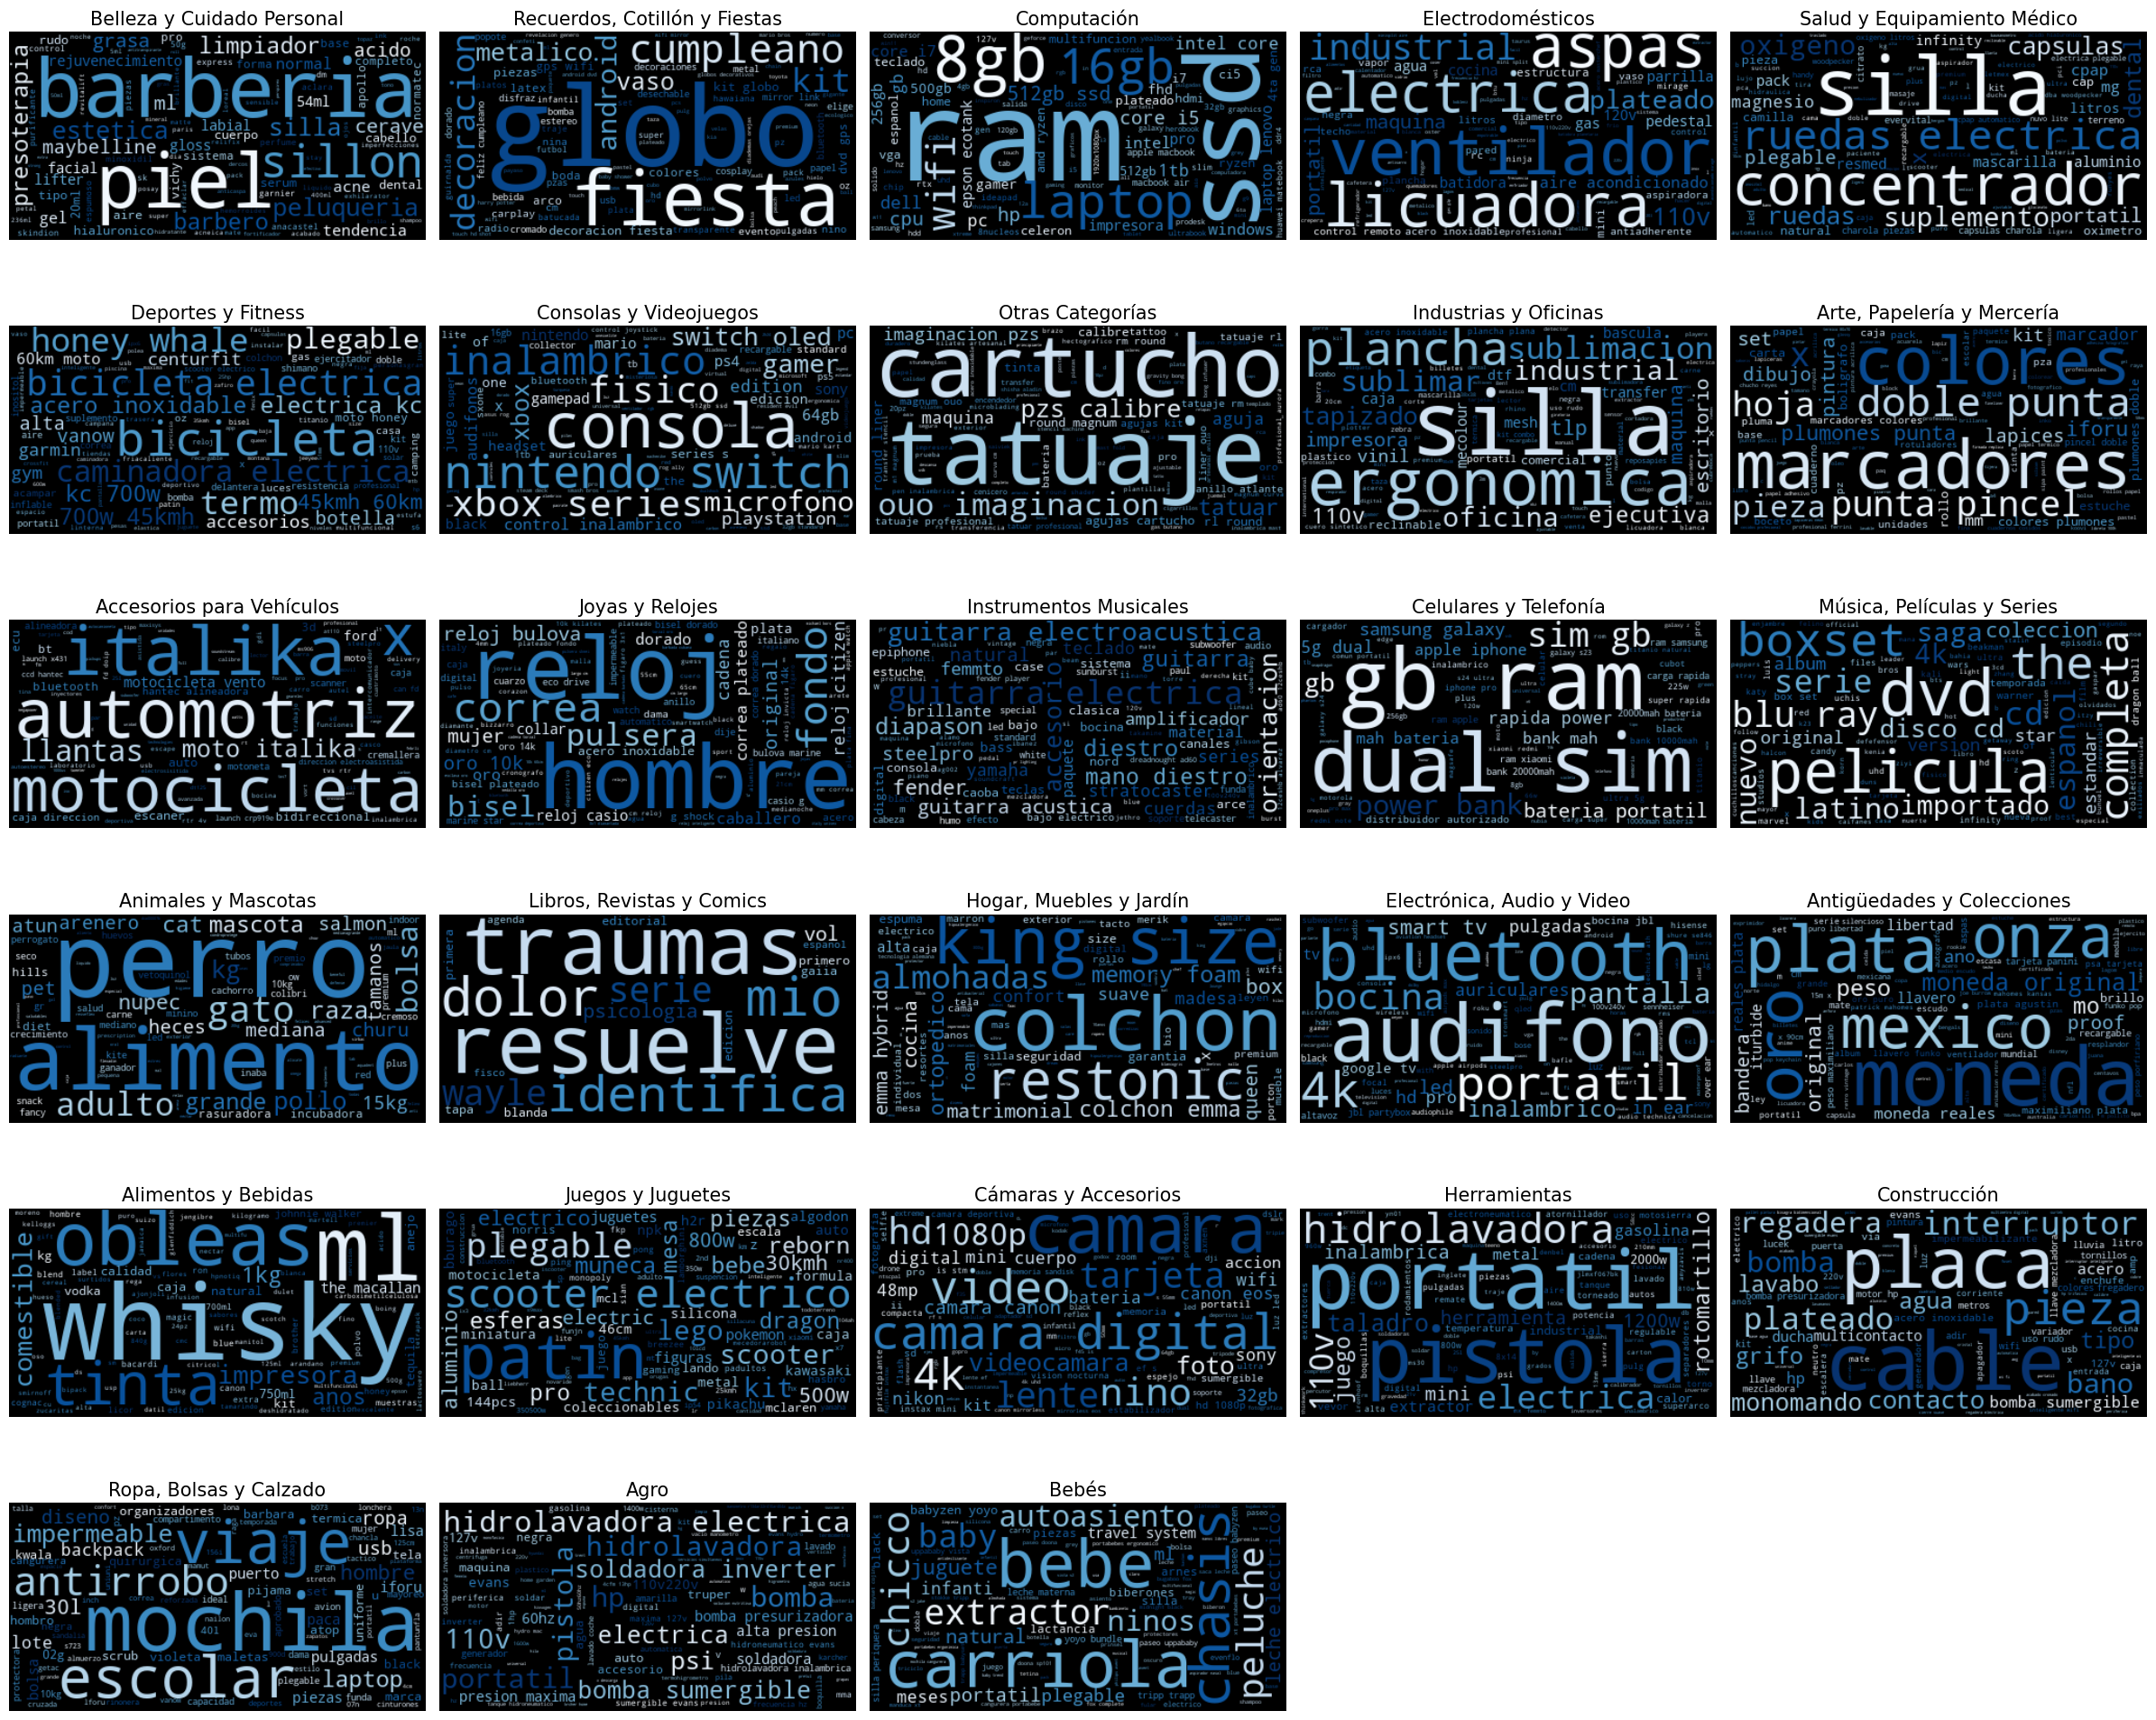

In [24]:


# Descargar stopwords en español
nltk.download('stopwords')
spanish_stopwords = set(stopwords.words('spanish'))

additional_stopwords = {'sabor','color', 'negro', 'blanco', 'rojo', 'azul', 'verde', 'amarillo', 'morado', 'naranja', 'gris', 'rosa'}
spanish_stopwords.update(additional_stopwords)

# Asegúrate de que tienes la columna 'category' en tu dataframe
categories = df_disc['category'].unique()

# Configurar la figura para subplots de 6x5 con un tamaño ajustado dinámicamente
figsize_width = 24
figsize_height = max(5, len(categories) // 5 * 4)  # Ajusta la altura según la cantidad de categorías
fig, axes = plt.subplots(6, 5, figsize=(figsize_width, figsize_height), dpi=100)
axes = axes.flatten()

# Iterar por cada categoría y generar la nube de palabras
for i, category in enumerate(categories):
    # Filtrar datos por categoría
    df_category = df_disc[df_disc['category'] == category]
    
    # Concatenar todos los títulos en un solo string
    text = " ".join(title for title in df_category['sanitized_title'])
    
    # Generar la nube de palabras
    wordcloud = WordCloud(stopwords=spanish_stopwords, background_color="black", max_words=100, colormap="Blues").generate(text)
    
    # Mostrar la nube de palabras en el subplot correspondiente
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(category, fontsize=15)  # Tamaño de fuente más pequeño para títulos largos

# Eliminar subplots vacíos
for ax in axes[len(categories):]:
    fig.delaxes(ax)

# Ajustar el layout con menor espacio entre subplots
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# Aplicar tight_layout para optimizar el espacio utilizado
plt.tight_layout()

# Mostrar la figura final
plt.show()


- En electrónica, audio y video los títulos que incluyen estos términos suelen estar asociados con productos que no dependen exclusivamente de descuentos para atraer a los compradores, ya que las características tecnológicas son un fuerte atractivo por sí mismas.
- En algunas categorías podemos darnos mayor idea de lo que se encuentra en descuento, por ejemplo, para la de libros, revistas y cómics, se puede suponer que se trata de libros de superación personal y esto puede responder a una baja demanda por estos títulos.
- Por otro lado para alimentos y bebidas resaltan en su mayoría son bebidas por ml(mililitros) y bebidas alcoholicas como whisky, vodka que son productos que probablemente por estacionalidad festivas pueda ser que tengan tienen descuentos.
- Diferencias Notables: Mientras que las categorías técnicas (como tecnología y electrodomésticos) utilizan un lenguaje más orientado a especificaciones y materiales, las categorías de moda y belleza se enfocan más en términos relacionados con tendencias, estacionalidad y bienestar. Esto indica diferentes enfoques de marketing adaptados a las características del producto y al público objetivo.
- Los productos que no dependen exclusivamente de descuentos, como aquellos con características tecnológicas avanzadas, pueden beneficiarse de estrategias de promoción que enfoquen más en sus características y menos en el precio.
- Esto podría servir como recomendacion para los vendedores Considera resaltar palabras clave que han demostrado ser efectivas en atraer atención dentro de cada categoría. Por ejemplo, términos técnicos en tecnología y electrodomésticos, y términos de tendencia en moda y belleza. 
    
    

### - Hay una diferencia entre la condición del producto, si es nuevo o usado, en cuanto a los descuentos?,
### - Existe un impacto del Listing Type en descuentos?
### - Descuento en función del tipo de envío

In [25]:
# Agrupa por condicion del producto (new, used) y calcula el % de descuento promedio 
discount_by_condition = df_disc.groupby('condition')['disc_prc'].mean().sort_values(ascending=False)
# Calcula el % descuento promedio por listing_type 
average_discount_by_listing_type = df_disc.groupby('listing_type_id')['disc_prc'].mean()

# Extrae free_shipping 
def extract_free_shipping(shipping_str):
    try:
        shipping_dict = ast.literal_eval(shipping_str)
        return shipping_dict.get('free_shipping', False)
    except (ValueError, SyntaxError):
        return None

df_disc['free_shipping'] = df_disc['shipping'].apply(extract_free_shipping)

# Calcula el % de descuento promedio con base en si el producto tuvo envio gratis o no
average_discount_by_shipping = df_disc.groupby('free_shipping')['disc_prc'].mean()

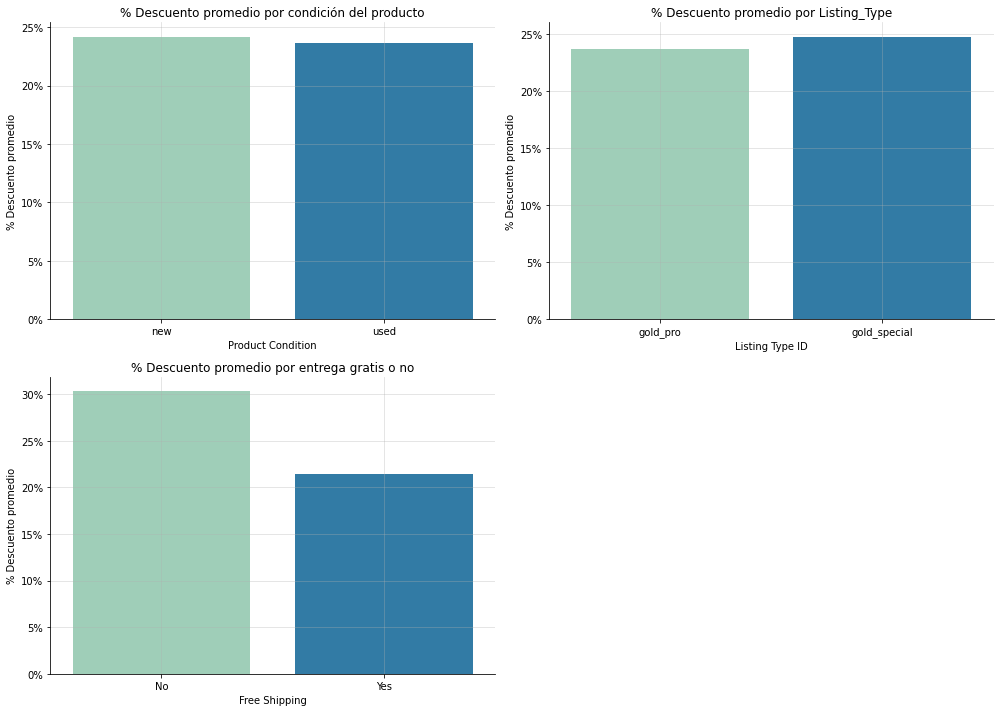

In [26]:
# Crea un grid de 2X2
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Grafica %descuento promedio por cada condición de producto (new, used)
sns.barplot(x=discount_by_condition.index, y=discount_by_condition.values, palette='YlGnBu', ax=ax[0, 0])
ax[0, 0].set_title('% Descuento promedio por condición del producto')
ax[0, 0].set_xlabel('Product Condition')
ax[0, 0].set_ylabel('% Descuento promedio')
ax[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax[0, 0].grid(True, alpha=0.4)
ax[0, 0].spines["top"].set_visible(False)
ax[0, 0].spines["right"].set_visible(False)

# Grafica %descuento promedio por listing_type 
sns.barplot(x=average_discount_by_listing_type.index, y=average_discount_by_listing_type.values, palette='YlGnBu', ax=ax[0, 1])
ax[0, 1].set_title('% Descuento promedio por Listing_Type')
ax[0, 1].set_xlabel('Listing Type ID')
ax[0, 1].set_ylabel('% Descuento promedio')
ax[0, 1].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax[0, 1].grid(True, alpha=0.4)
ax[0, 1].spines["top"].set_visible(False)
ax[0, 1].spines["right"].set_visible(False)

# Grafica %descuento promedio por free shiping or not
sns.barplot(x=average_discount_by_shipping.index, y=average_discount_by_shipping.values, palette='YlGnBu', ax=ax[1, 0])
ax[1, 0].set_title('% Descuento promedio por entrega gratis o no')
ax[1, 0].set_xlabel('Free Shipping')
ax[1, 0].set_ylabel('% Descuento promedio')
ax[1, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax[1, 0].set_xticklabels(['No', 'Yes'])
ax[1, 0].grid(True, alpha=0.4)
ax[1, 0].spines["top"].set_visible(False)
ax[1, 0].spines["right"].set_visible(False)

# Dejamos el cuarto spot por si se agrega otro gráfico
ax[1, 1].axis('off')  # Quita esta línea si quieres agregar otro gráfico

plt.tight_layout()
plt.show()


- A primer vista el análisis muestra que los productos nuevos tienen un descuento promedio ligeramente mayor (24.2%) en comparación con los usados (23.6%), pero la diferencia es muy pequeña.
- Los descuentos son muy similares, el gold_special tiene un descuento ligeramente mayor (1.08%), esto sugiere que para esta muestra no hay una gran diferencia entre el tipo de publicación
- Esto sugiere que los productos con envío gratuito podrían estar ofreciendo menores descuentos, posiblemente porque el valor del envío ya está siendo absorbido en el precio final, reduciendo la necesidad de aplicar un descuento adicional significativo.

### Duración de las promociones

La columna **sale_price** contiene información adicional, solo que se encuentra en forma de diccionarios, vamos a extraer cierta información para poder analizar la temporalidad de los descuentos

In [29]:
df_disc['sale_price_dict'] = df_disc['sale_price'].apply(ast.literal_eval)

# Extraemos las fechas de la columna sale_price_dict
df_disc['start_time'] = df_disc['sale_price_dict'].apply(lambda x: x['conditions']['start_time'])
df_disc['end_time'] = df_disc['sale_price_dict'].apply(lambda x: x['conditions']['end_time'])

# Convertir a objetos datetime
df_disc['start_time'] = pd.to_datetime(df_disc['start_time'])
df_disc['end_time'] = pd.to_datetime(df_disc['end_time'])

df_clean = df_disc.dropna(subset = ['start_time','end_time'])

# Crear una columna para el día de la semana en el que comienza la promoción
df_clean['start_day_of_week'] = df_clean['start_time'].dt.day_name()

# Calcular la duración de la promoción en horas
df_clean['promotion_duration_hours'] = (df_clean['end_time'] - df_clean['start_time']).dt.total_seconds() / 3600

# Agrupar los datos por categoría y día de la semana para contar el número de promociones que comienzan cada día
promotions_by_day_of_week = df_clean.groupby(['category', 'start_day_of_week']).size().unstack(fill_value=0)

# Ordenar los días de la semana para que aparezcan en orden natural (Lunes, Martes, etc.)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
promotions_by_day_of_week = promotions_by_day_of_week[ordered_days]

# Calcular el número total de promociones por categoría
total_promotions_by_category = df_clean.groupby('category')['start_day_of_week'].count()

# Calcular la proporción de promociones que comienzan cada día de la semana dentro de cada categoría
proportion_by_day_of_week = promotions_by_day_of_week.div(total_promotions_by_category, axis=0)


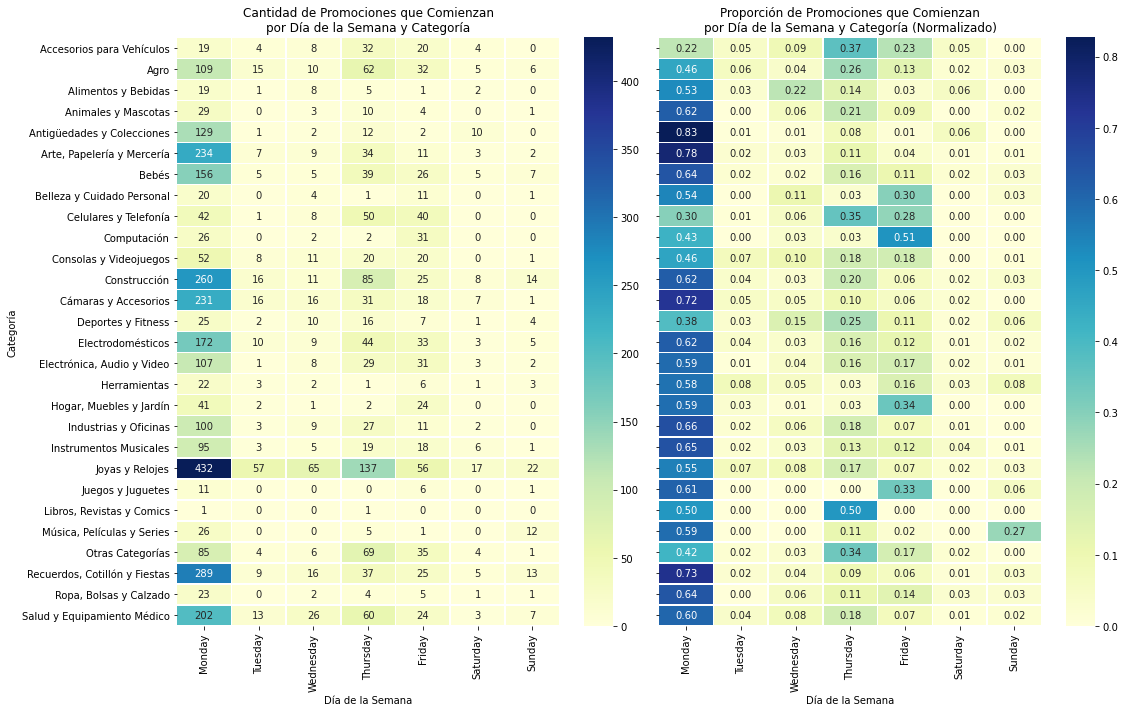

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

# Primer heatmap: Cantidad de Promociones que Comienzan por Día de la Semana y Categoría
sns.heatmap(promotions_by_day_of_week, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, ax=ax1)
ax1.set_title('Cantidad de Promociones que Comienzan\npor Día de la Semana y Categoría')
ax1.set_xlabel('Día de la Semana')
ax1.set_ylabel('Categoría')

# Segundo heatmap: Proporción de Promociones Normalizado
sns.heatmap(proportion_by_day_of_week, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5, ax=ax2)
ax2.set_title('Proporción de Promociones que Comienzan\npor Día de la Semana y Categoría (Normalizado)')
ax2.set_xlabel('Día de la Semana')
ax2.set_ylabel('')

# Ajustar el layout para que no se superpongan los títulos y etiquetas
plt.tight_layout()
plt.show()


Con estos gráficos puedes ver rápidamente qué días son más populares para iniciar promociones dentro de cada categoría.
Las categorías con colores más oscuros en los días de inicio indican una tendencia clara en el uso de esos días para lanzar promociones.

- **Optimización del Inicio de Promociones**: Dado que los lunes son consistentemente el día más popular para iniciar promociones, podría ser beneficioso para los vendedores considerar si están maximizando la visibilidad en este día, o si podrían beneficiarse de iniciar promociones en días menos saturados.
- **Diversificación de Días**: Para algunas categorías, como Computación y Celulares y Telefonía, podría haber oportunidades de dispersar las promociones a lo largo de la semana para evitar competencia interna y mejorar la visibilidad de cada promoción.
- **Estrategia de Fin de Semana**: Aunque pocas promociones comienzan los fines de semana, explorar campañas que aprovechen la menor competencia en estos días podría ser una estrategia valiosa para ciertas categorías.

### Duración en días de promociones por categorías

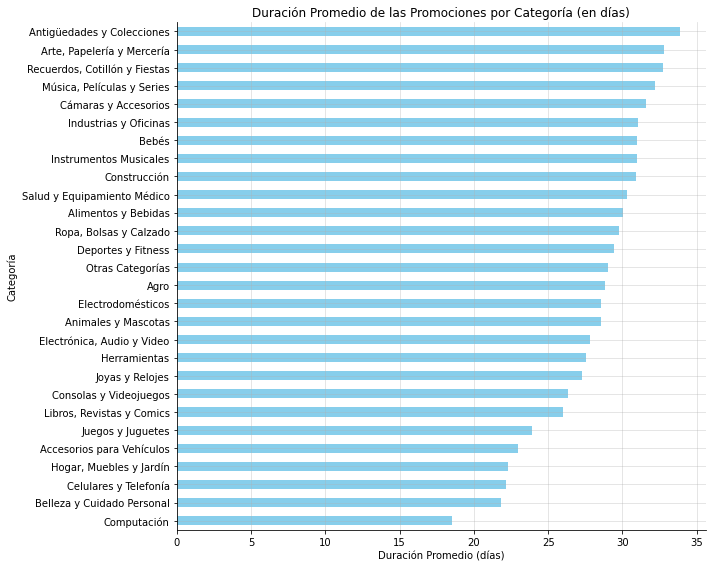

In [31]:


# Calcular la duración promedio de las promociones en horas por categoría
average_duration_by_category = df_clean.groupby('category')['promotion_duration_hours'].mean().sort_values()
# Convertir la duración promedio de horas a días
average_duration_by_category_days = average_duration_by_category / 24

# Graficar la duración promedio de las promociones por categoría en días
fig, ax = plt.subplots(figsize=(10, 8))
average_duration_by_category_days.plot(kind='barh', color='skyblue')
plt.title('Duración Promedio de las Promociones por Categoría (en días)')
plt.xlabel('Duración Promedio (días)')
plt.ylabel('Categoría')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.grid(True, alpha = 0.4)
plt.tight_layout()
plt.show()



- Optimización de Duración: Para categorías como Computación, donde las promociones son más cortas, podría ser beneficioso experimentar con la extensión de ciertas promociones para ver si esto impacta positivamente en las ventas.
- Reevaluación de Promociones Prolongadas: En categorías con promociones muy largas, como Antigüedades y Colecciones, los vendedores podrían considerar introducir promociones más cortas y frecuentes para crear un sentido de urgencia.
- Ajuste de Estrategias Estacionales: Para categorías como Ropa, Bolsas y Calzado o Deportes y Fitness, donde las promociones tienen duraciones intermedias, ajustar la duración de las promociones para alinearse con los ciclos estacionales podría maximizar el impacto.

### Next Steps

- Un análisis interesante sería la temporalidad por categoría, disponer de información histórica y ver la estacionalidad de los descuentos por categorías.
- Variación en el tiempo los precios de los productos para identificar la variación real de los productos. 
- Análisis de clustering para identificar si existen ciertas categorías ocultas o combinadas que no estuvieramos viendo en el análisis actual.
- Rendimiento de la Campaña, con la información correcta puedes rastrear el rendimiento de campañas publicitarias específicas, analizando qué promociones fueron más efectivas en términos de descuentos ofrecidos y ventas generadas.
- Comparación de tipos de promoción, analizar el impacto de diferentes tipos de promociones (promotion_type) como **deal_of_the_day** o **flash_sale** y cómo se comparan entre sí.

In [ ]:
import session_info
session_info.show(html=False)